# Dataset Description

- Name of the dataset: Exam Scores Dataset at a public school.
- Dataset link: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores
- Dataset download: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores?select=Expanded_data_with_more_features.csv#:~:text=calendar_view_week-,Expanded_data_with_more_features,-.csv
- License of the dataset: Kaggle is a public competition website, which means everyone can use it.
- Size: 3 MB


## Data dictionary: 

- Gender: Gender of the student (male/female)
- EthnicGroup: Ethnic group of the student (group A to E)
- ParentEduc: Parent(s) education background (from some_highschool to master's degree)
- LunchType: School lunch type (standard or free/reduced)
- TestPrep: Test preparation course followed (completed or none)
- ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
- PracticeSport: How often the student parctice sport (never/sometimes/regularly))
- IsFirstChild: If the child is first child in the family or not (yes/no)
- NrSiblings: Number of siblings the student has (0 to 7)
- TransportMeans: Means of transport to school (schoolbus/private)
- WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
- MathScore: math test score(0-100)
- ReadingScore: reading test score(0-100)
- WritingScore: writing test score(0-100)

Most of the data types are strings and the Scores are numeric.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_score.csv")
df = df.drop("Unnamed: 0", axis =1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Correlation Heatmap: Prep of Exam & Score

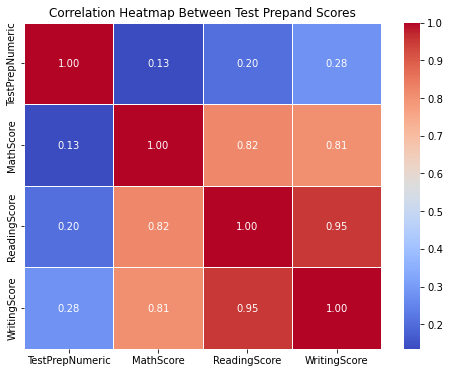

In [3]:
df['TestPrep'].fillna('none', inplace=True)
df['TestPrepNumeric'] = df['TestPrep'].apply(lambda x: 1 if x == 'completed' else 0)

# Calculate the correlation matrix again with the updated 'TestPrep' status
correlation_matrix = df[['TestPrepNumeric', 'MathScore', 'ReadingScore', 'WritingScore']].corr()

# Create a heatmap for the new correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap = 'coolwarm', linewidths=.5)
plt.title('Correlation Heatmap Between Test Prepand Scores')
plt.show()

# Pair Plot of Math, Reading and Writing Scores

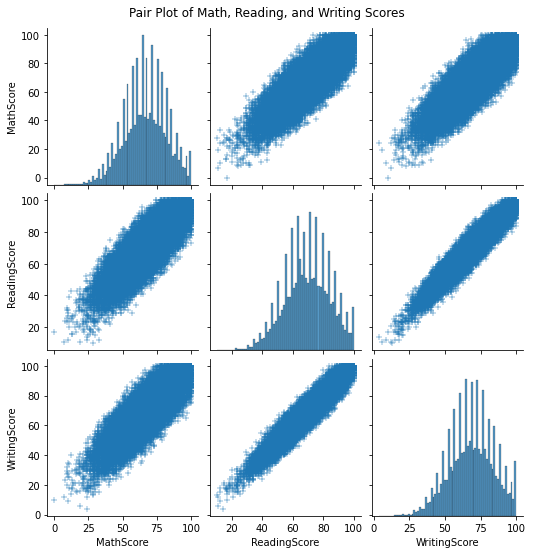

In [14]:
# Prepare data for pair plot analysis - focusing on scores
data_scores = df[['MathScore', 'ReadingScore', 'WritingScore']].dropna()

# Creating pair plot for Math, Reading, and Writing scores
sns.pairplot(data_scores, markers = "+")
plt.suptitle('Pair Plot of Math, Reading, and Writing Scores', y=1.02)  
plt.show()

# Chart 3&4: Pie Chart of ethnicity distribution and Violin Plot of Score for different Ethinic Groups

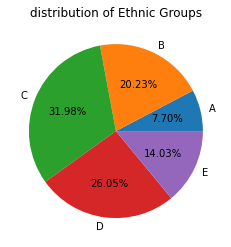

In [19]:
df['TotalScore'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore']
data_ethnic_groups = df[['EthnicGroup', 'TotalScore']].dropna()
order = ['group A', 'group B', 'group C','group D','group E']

groupA = data_ethnic_groups.loc[(df['EthnicGroup']== "group A")].count()
groupB = data_ethnic_groups.loc[(df['EthnicGroup']== "group B")].count()
groupC = data_ethnic_groups.loc[(df['EthnicGroup']== "group C")].count()
groupD = data_ethnic_groups.loc[(df['EthnicGroup']== "group D")].count()
groupE = data_ethnic_groups.loc[(df['EthnicGroup']== "group E")].count()

l = ["A","B","C","D","E"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

plt.pie(mlist,labels=l,autopct = "%1.2f%%")
plt.title("distribution of Ethnic Groups")
plt.show()

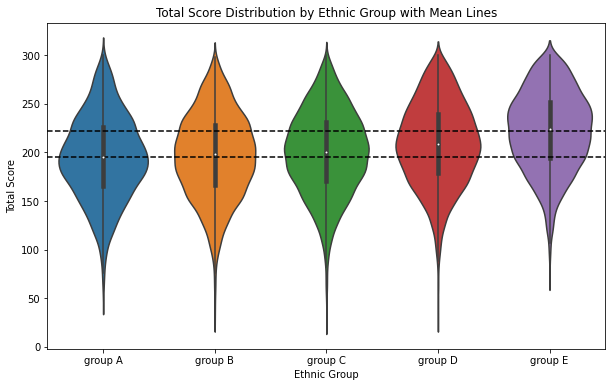

In [18]:
# Violin plot with mean reference lines
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=data_ethnic_groups, x='EthnicGroup', y='TotalScore',order = order)
plt.title('Total Score Distribution by Ethnic Group with Mean Lines')

# Calculate means for each group and add lines for specified groups
group_means = data_ethnic_groups.groupby('EthnicGroup')['TotalScore'].mean()
desired_groups = ['group A', 'group E']  
for group in desired_groups:
    mean = group_means.get(group)
    if mean:
        plt.axhline(y=mean, color='black', linestyle='--', label=f'Mean of {group}')

plt.xlabel('Ethnic Group')
plt.ylabel('Total Score')
plt.show()
